In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_logistic_regression
from my_logistic_regression import LogisticRegressionImpl
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Load and process dataset
load breast_cancer.csv, drop columns "id" and "Unnamed: 32", investigate the dataset, and divide into train and test with 80/20 ratio, map values of "diagnosis" from ("B","M") to (0,1)

In [2]:
df = pd.read_csv('breast_cancer.csv')
df = df.drop(['id', 'Unnamed: 32'], 1)
df = df.replace({'M': 1, 'B': 0})

In [3]:
#check for null/ NaN values
print(df.isnull().any().any())
#check for missing values
print(df.isnull().values.any())

False
False


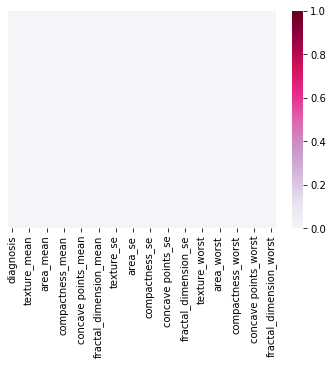

In [4]:
#check for null values graphically
heat_map = sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [6]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#target
y = df['diagnosis']

In [8]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
X_full = df[df.columns.difference(['diagnosis'])]
X_full

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,1001.0,153.40,2019.0,0.27760,0.04904,0.66560,0.14710,0.01587,0.2654,0.30010,...,25.380,0.11840,0.006399,0.16220,0.2419,0.03003,0.4601,10.38,0.9053,17.33
1,1326.0,74.08,1956.0,0.07864,0.01308,0.18660,0.07017,0.01340,0.1860,0.08690,...,24.990,0.08474,0.005225,0.12380,0.1812,0.01389,0.2750,17.77,0.7339,23.41
2,1203.0,94.03,1709.0,0.15990,0.04006,0.42450,0.12790,0.02058,0.2430,0.19740,...,23.570,0.10960,0.006150,0.14440,0.2069,0.02250,0.3613,21.25,0.7869,25.53
3,386.1,27.23,567.7,0.28390,0.07458,0.86630,0.10520,0.01867,0.2575,0.24140,...,14.910,0.14250,0.009110,0.20980,0.2597,0.05963,0.6638,20.38,1.1560,26.50
4,1297.0,94.44,1575.0,0.13280,0.02461,0.20500,0.10430,0.01885,0.1625,0.19800,...,22.540,0.10030,0.011490,0.13740,0.1809,0.01756,0.2364,14.34,0.7813,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1479.0,158.70,2027.0,0.11590,0.02891,0.21130,0.13890,0.02454,0.2216,0.24390,...,25.450,0.11100,0.010300,0.14100,0.1726,0.01114,0.2060,22.39,1.2560,26.40
565,1261.0,99.04,1731.0,0.10340,0.02423,0.19220,0.09791,0.01678,0.1628,0.14400,...,23.690,0.09780,0.005769,0.11660,0.1752,0.01898,0.2572,28.25,2.4630,38.25
566,858.1,48.55,1124.0,0.10230,0.03731,0.30940,0.05302,0.01557,0.1418,0.09251,...,18.980,0.08455,0.005903,0.11390,0.1590,0.01318,0.2218,28.08,1.0750,34.12
567,1265.0,86.22,1821.0,0.27700,0.06158,0.86810,0.15200,0.01664,0.2650,0.35140,...,25.740,0.11780,0.006522,0.16500,0.2397,0.02324,0.4087,29.33,1.5950,39.42


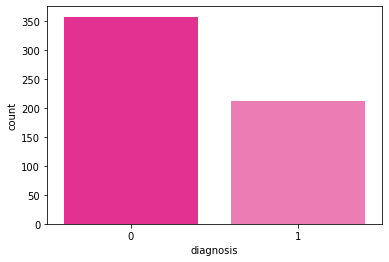

In [10]:
sns.countplot(df['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(df['diagnosis']).iloc[:17].index)
plt.show()

In [11]:
#From above summary we can conclude
#We have 30 columns excluding the diagnosis column
#But we have 3 groups(1.mean 2.standard errors(SE) 3.worst (mean of the three largest values)))            
#Thus we can analyze the data in only one of the three perspectives. 
#We can choose 10 keys features and the diagnosis "mean" columns.

C:\Users\Nune\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nune\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


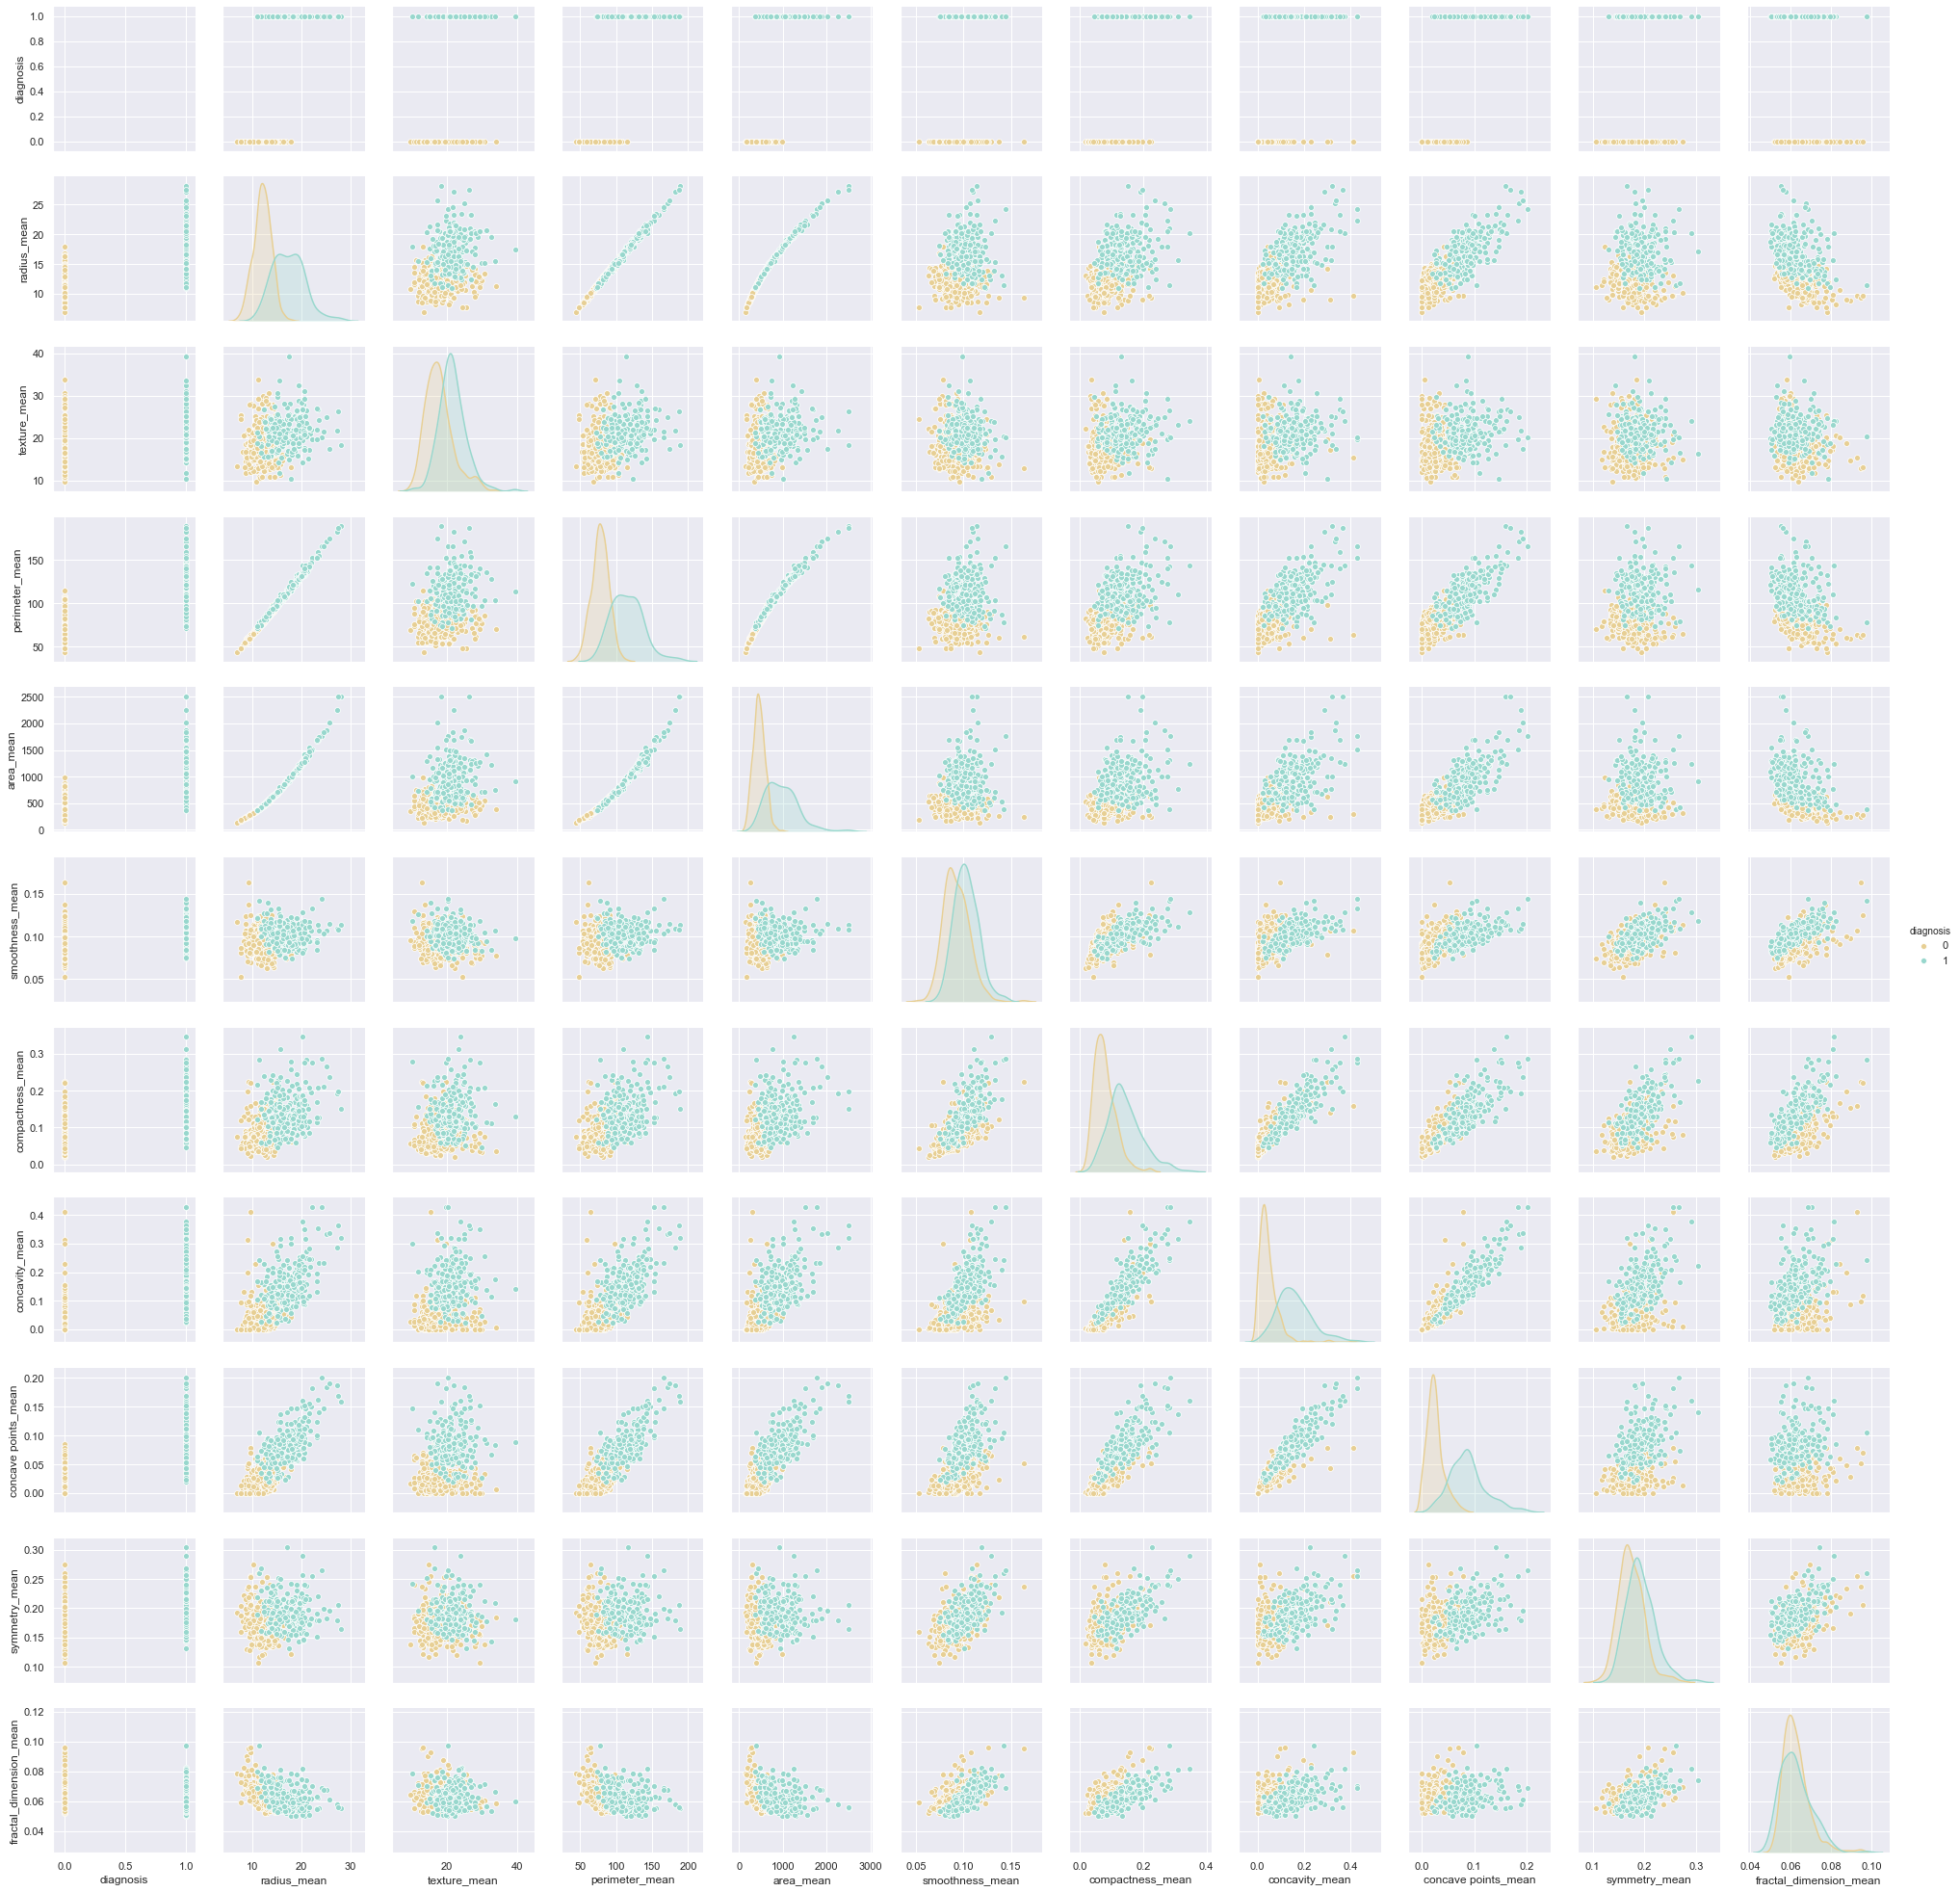

In [12]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.set(font_scale=1)
sns.pairplot(data=df[cols], hue='diagnosis', palette='BrBG')

In [13]:
#From pairplot graph we can clude
#1.First set ['radius', 'perimeter', 'area'] have multicolliniearity (from almost perfectly linear patterns) 
#2.Second set ['concavity', 'concave_points', 'compactness'] also have multicolliniearity

In [14]:
def down_triangle_corr(dataset): 
    corr = dataset.corr().round(2)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(20, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.tight_layout()
    plt.show()  

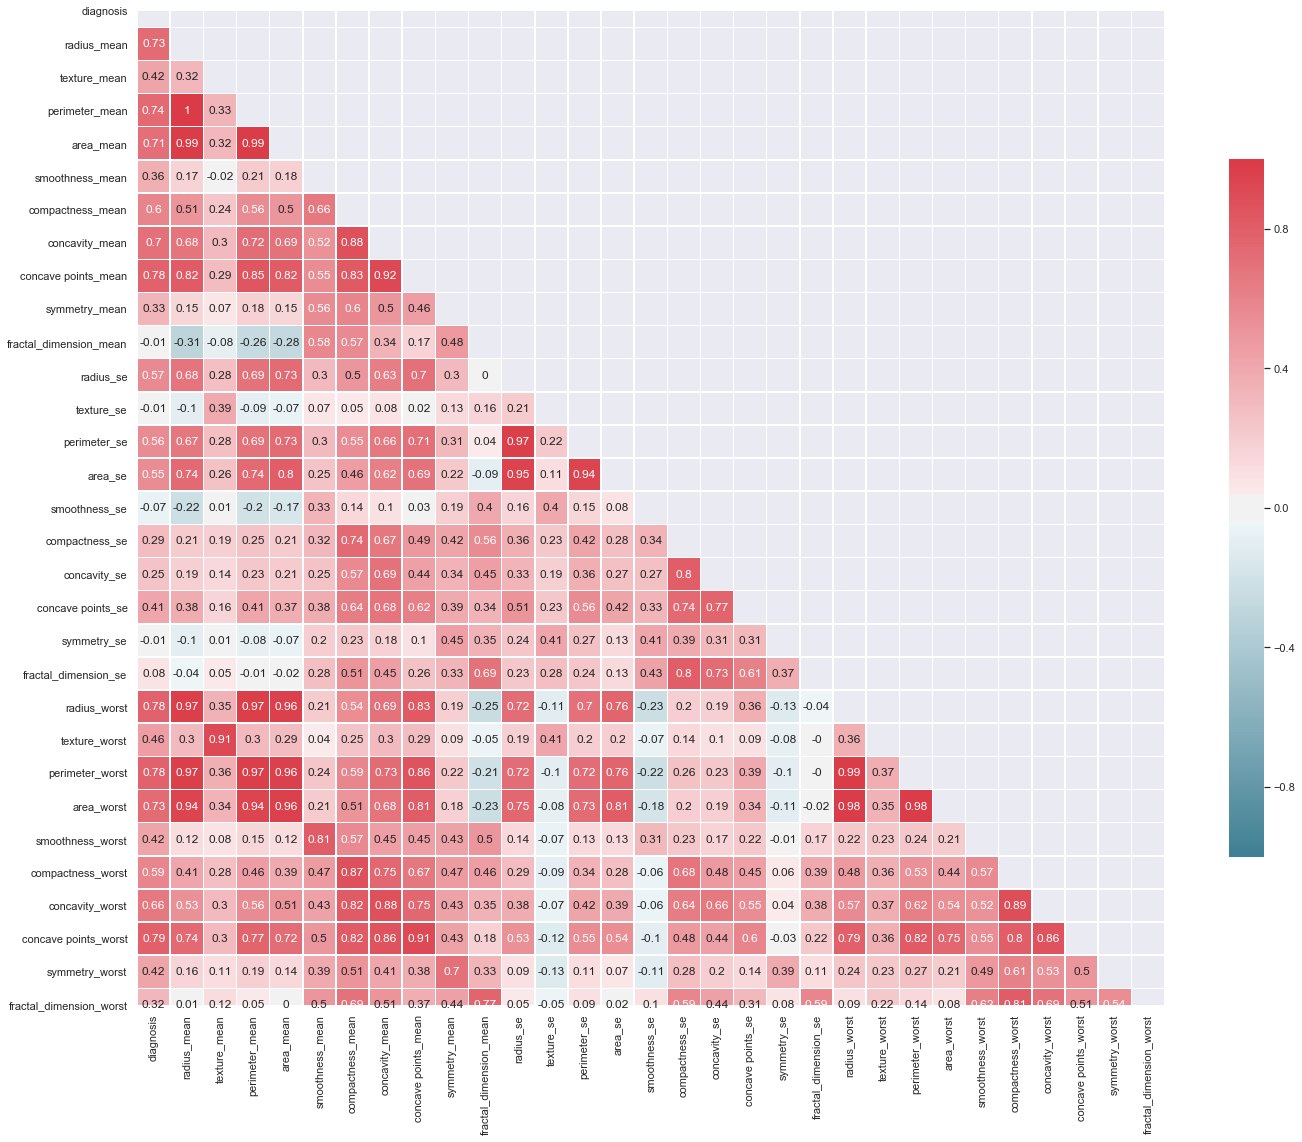

In [15]:
down_triangle_corr(df) 

In [16]:
#From this graph  we can conclude
#1.['radius_mean', 'perimeter_mean', 'area_mean'] columns has corr [0.99, 1] 
#It means they contain similar data and we should select one of the three columns, 
#as cell perimeter=2pr and area=2pr^2, they depend on radius,=> we will select ['radius']
#2.We see ['worst'] and ['mean'] has collinearity(), correlation [0.7, 0.97] is high
#as 'worst' is a subset of 'mean', we can discard all 'worst' columns
#3.['compactness', 'concavity', 'concave points'] have collinearity =>
# => we will choose 'compactness'

In [17]:
#will do corrections
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

In [18]:
print('columns:', df.columns)
print('columns_length:', len(df.columns))

columns: Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')
columns_length: 13


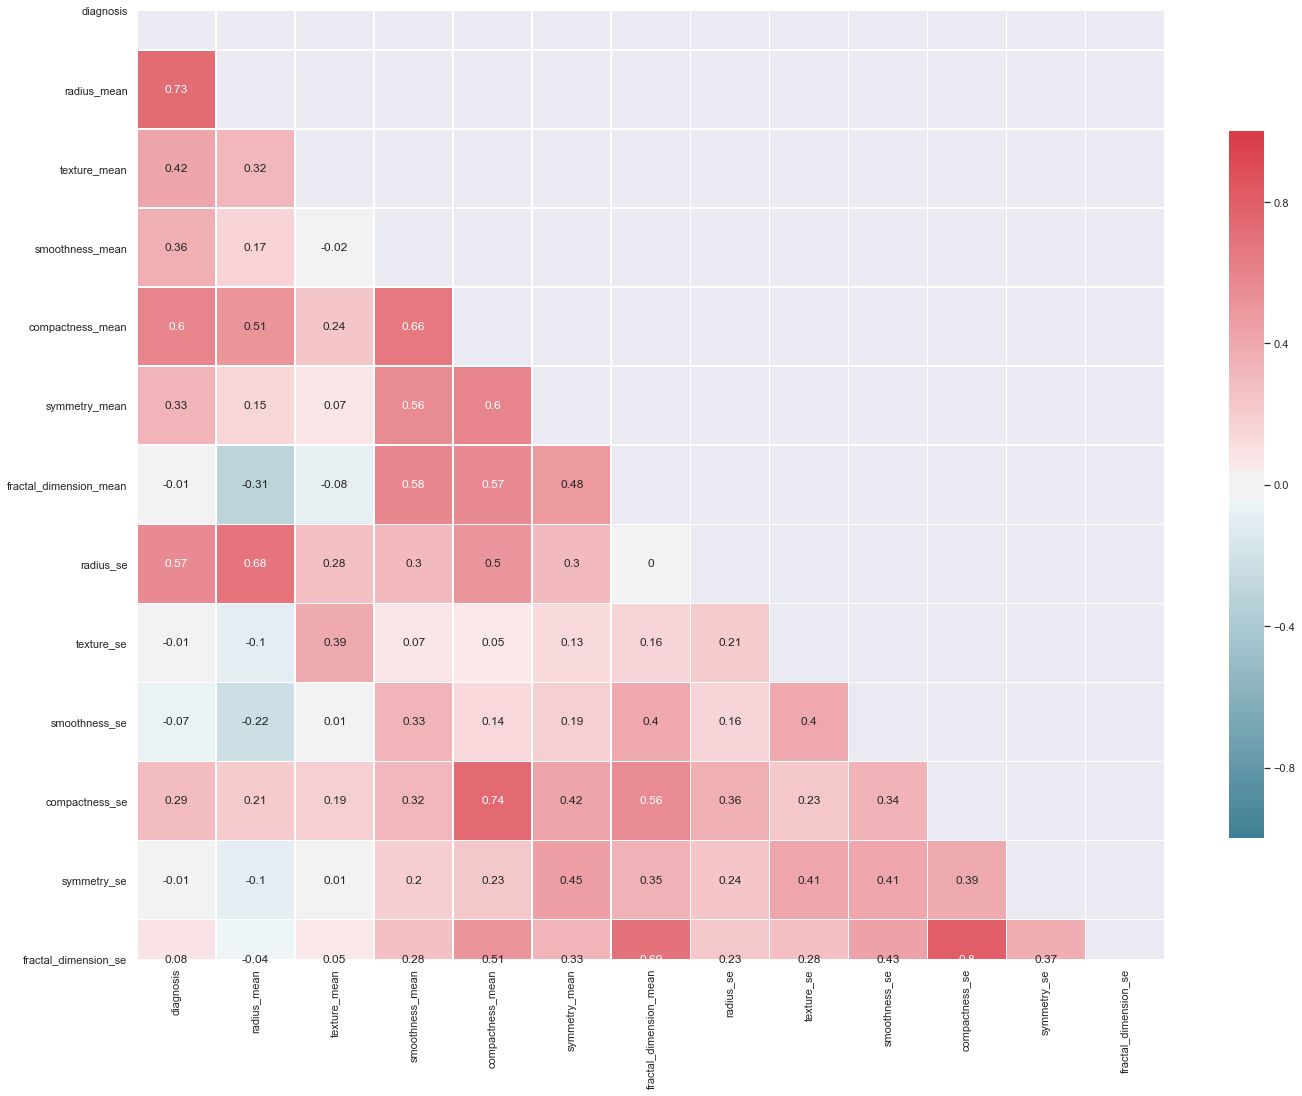

In [19]:
#the new df correlation heatmap will be
down_triangle_corr(df) 


In [20]:
df.corr()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.330499,-0.012838,0.567134,-0.008303,-0.067016,0.292999,-0.006522,0.077972
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,-0.104321,-0.042641
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.009127,0.054458
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.200774,0.283607
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.229977,0.507318
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.449137,0.331786
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.345007,0.688132
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.240567,0.227754
texture_se,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.411621,0.279723
smoothness_se,-0.067016,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.413506,0.427374


In [21]:
X = df[df.columns.difference(['diagnosis'])]

In [22]:
from sklearn.model_selection import train_test_split

#split corrected(13) features
xTrain_unsc, xTest_unsc, yTrain_unsc, yTest_unsc=train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
xTrain, xTest, yTrain, yTest = xTrain_unsc, xTest_unsc, yTrain_unsc, yTest_unsc 

In [24]:
def featureNormalization(X, mean, std):
    """
    Take in numpy array of X values and return normalize X values
    """
    return (X - mean)/std

In [25]:
xTrain = np.array(xTrain)
xTest = np.array(xTest)
xTrain = np.array(xTrain)
xTest = np.array(xTest)

sts = StandardScaler()
sts.fit(xTrain)
xTrain = sts.transform(xTrain)
xTest = sts.transform(xTest)

In [26]:
xTrain

array([[ 0.71892128,  3.25102691,  2.45817261, ...,  2.62116574,
        -0.43531947, -0.01605246],
       [ 3.42627493,  1.18122247,  1.55839569, ..., -0.31771686,
         1.73302577, -0.81268678],
       [-0.30735463,  0.7394992 ,  0.95437877, ...,  2.61504052,
        -1.24962228,  1.96305996],
       ...,
       [-1.46661332, -1.17965663, -1.24924156, ..., -0.63867862,
        -0.55500086, -0.89233173],
       [ 0.18470069, -0.41565291,  0.37257857, ..., -1.02211765,
         0.10207345, -0.46084457],
       [-1.20656237, -1.05117487, -0.83128963, ..., -0.74770761,
         0.31327591,  0.6806099 ]])

## Implementing KMeans

In [27]:
class KMeans_My(object):
    def __init__(self, K, metric='L2', max_iter=1000, eps=1e-6, centers_init='random', random_state=42):
        self.K = K
        self.max_iter = max_iter
        self.eps = eps
        self.cluster_centers = np.array([])
        self.metric = metric
        self.centers_init = centers_init
        self.random_state = random_state
        """
        TODO:
        if metric is 'L2' let self.norm be a function that computes euclidian distance between x and y vectors,
        if metric is 'L1' let self.norm be a function that computes manhattan distance between x and y vectors,
        otherwise raise not implemented error
        """
     ################### kmeans helper methods##########################################
    
    def get_centroid_biggest_change(self, old_centr, new_centr):
        centroid_change = []
        for i in range(K):
            change = self.norm(old_centr[i], new_centr[i])
            centroid_change.append(change)
        return max(centroid_change)

    def get_dist_array(self, X, centroids):
        K = centroids.shape[0]
        n = len(X)
        dist_array=np.zeros((n, K))
        for i in range(n):
            for j in range(K):
                dist_array[i, j] = self.norm(X[i], centroids[j])
        return dist_array
 
    def cluster_min_distance_mean(self, dist_array):
        cluster_min_dist=np.argmin(dist_array, axis=1)
        return cluster_min_dist    
              
    def norm(self, X, Y):
        if (self.metric == 'L2'):
            return np.linalg.norm((X - Y), ord=2)
        elif(self.metric == 'L1'):
            return np.linalg.norm((X - Y), ord=1)
        else: 
            raise NotImplementedError  
        
    def distortion(self, X):
        """
        param X: numpy array of shape (M,N)
        param r: numpy array of shape (M), shows to which cluster each row of X belongs
        return: distortion value of the dataset
        """
        vec_mins, dist_arr = self.predict(X)
        n = len(X)
        J = 0
        for i in range(n):
            index = vec_mins[i]
            J += dist_arr[i, index]
           
        return J
    
    def distortion1(self, X):
        """
        param X: numpy array of shape (M,N)
        param r: numpy array of shape (M), shows to which cluster each row of X belongs
        return: distortion value of the dataset
        """
        vec_mins, dist_arr = self.predict(X)
        n = len(X)
        J = 0
        for i in range(n):
            index = vec_mins[i]
            J += dist_arr[i, index]
           
        return J
        
    def init_centroids(self, X):
        """
        :param X: numpy array of shape (M,N)
        :param centers_init: numpy array of shape (K,N)
        """
        """TODO: 
        If centers_init is 'random' initialize self.cluster_centers with random K items from X,
        if it is 'kmeans++' initialize centroids according to the algorithm in 
        http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf page 3,
        otherwise raise not implemented error .
        """
        if (self.centers_init == 'random'):
            self.cluster_centers = self.random_centr(self.K, X) 
        elif (self.centers_init == 'kmeans++'):
            self.cluster_centers = self.kmeans_plus_plus(self.K, X)
        else:       
            raise NotImplementedError
    
    
    ####################################################################
    
    def random_centr(self, K, X):
        np.random.seed(self.random_state)
        centroids = []
        n = np.shape(X)[0]
        for i in range(K):
            r = np.random.randint(0, n-1)
            centroids.append(X[r])  
        return np.array(centroids) 
    
    def kmeans_plus_plus(self, K, X):   
        np.random.seed(self.random_state)
        centroids = [X[0]]

        for i in range(1, K):
            dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in X])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(X[i])
        
        return np.array(centroids)
    
    
    ####################################################################
    def fit(self, X):
        """
        :param X: numpy array of shape (M,N)
        :param centers_init: numpy array of shape (K,N)
        """
        """TODO: 
        1. Initialize cluster centers using self.init_centroids method
        2. Implement KMeans algorithm and  terminate it when either self.max_iter iterations are performed,
        or the biggest change in cluster centers is smaller than self.eps
        
        The final cluster centers should be saved in self.cluster_centers
        """
        self.init_centroids(X)
        
        centroids = self.cluster_centers
        old_centr = np.zeros(centroids.shape)
        new_centr = centroids
        iterator = 0
        biggest_centroid_change = self.get_centroid_biggest_change(old_centr, new_centr)
        while ((iterator < self.max_iter) and (biggest_centroid_change > self.eps)):
            centroid_list = []
            iterator+=1
            dist_array = self.get_dist_array(X, new_centr) 
            cluster_min_dist=self.cluster_min_distance_mean(dist_array)

            for index in range(len(centroids)):
                close_points_index = [i for i in range(len(cluster_min_dist)) if cluster_min_dist[i] == index]
                centroid_list.append(np.mean(X[close_points_index], axis=0))
            
            old_centr = new_centr    
            new_centr = np.array(centroid_list)  
            biggest_centroid_change = self.get_centroid_biggest_change(old_centr, new_centr)
        
        return new_centr
    
    def predict(self, X):
        dist_arr = self.get_dist_array(X, self.cluster_centers)
        vec_mins = self.cluster_min_distance_mean(dist_arr)
   
        return vec_mins, dist_arr

## Cluster the dataset with kmeans, model and predict malignancy of tumors in the test set entries
## 1. Perform clustering using the following hyperparameter pairs
1. metric='L1', center_init='random'
2. metric='L1', center_init='kmeans++'
3. metric='L2', center_init='random'
4. metric='L2', center_init='kmeans++'

## 2. Predict malignancy of tumors in the test set entries using all 4 models trained above, compare their performances.


In [28]:
#1st task
K=2

model1 = KMeans_My(K, metric='L1', max_iter=1000, eps=1e-6, centers_init='random')
centers1 = model1.fit(xTrain)
print('model1 centers1:', centers1)
model2 = KMeans_My(K, metric='L1', max_iter=1000, eps=1e-6, centers_init='kmeans++')
centers2 = model2.fit(xTrain)
print('model2 centers2:', centers2)
model3 = KMeans_My(K, metric='L2', max_iter=1000, eps=1e-6, centers_init='random')
centers3 = model3.fit(xTrain)
print('model3 centers3:', centers3)
model4 = KMeans_My(K, metric='L2', max_iter=1000, eps=1e-6, centers_init='kmeans++')
centers4 = model4.fit(xTrain)
print('model4 centers4:', centers4)

model1 centers1: [[-0.34753544 -0.34145726 -0.29609657 -0.30327076 -0.07969799 -0.19999589
  -0.23841106 -0.19760756 -0.29352736 -0.23605585 -0.08140664 -0.14980207]
 [ 1.29963775  1.27690789  1.10727778  1.13410627  0.29803728  0.7479013
   0.89155801  0.73896994  1.09767001  0.88275053  0.30442692  0.56019734]]
model2 centers2: [[ 1.3487928   1.3457795   1.21970252  1.20959311  0.25425776  0.7489105
   0.97036319  0.81502615  1.15750738  0.9336735   0.26003023  0.56973525]
 [-0.31887221 -0.31815983 -0.28835358 -0.28596359 -0.06010985 -0.17705221
  -0.22940651 -0.19268281 -0.27364984 -0.22073259 -0.06147454 -0.13469285]]
model3 centers3: [[-0.50360746 -0.42320287 -0.36184061 -0.35640334 -0.20652882 -0.32710659
  -0.38731551 -0.24374055 -0.40537057 -0.25536169 -0.14400391 -0.18638393]
 [ 1.07667802  0.90477854  0.77359026  0.76196577  0.44154437  0.69933132
   0.82805384  0.52110049  0.86665433  0.54594567  0.30787042  0.39847598]]
model4 centers4: [[ 1.07667802  0.90477854  0.77359026

In [29]:
y_pred1_test_my, dist_arr1 = model1.predict(xTest)
y_pred1_train_my, dist_arr1 = model1.predict(xTrain)
#print('y_pred1_test_my: ', y_pred1_test_my)
y_pred2_test_my, dist_arr2 = model2.predict(xTest)
y_pred2_train_my, dist_arr2 = model2.predict(xTrain)
#print('y_pred2_test_my: ', y_pred2_test_my)
y_pred3_test_my, dist_arr3 = model3.predict(xTest)
y_pred3_train_my, dist_arr3 = model3.predict(xTrain)
#print('y_pred3_test_my: ', y_pred3_test_my)
y_pred4_test_my, dist_arr4 = model4.predict(xTest)
y_pred4_train_my, dist_arr4 = model4.predict(xTrain)
#print('y_pred4_test_my: ',y_pred4_test_my )

In [30]:
accuracy1_train_my = metrics.accuracy_score(yTrain, y_pred1_train_my)
print('accuracy1_train_my: ', accuracy1_train_my * 100)
accuracy2_train_my = metrics.accuracy_score(yTrain, y_pred2_train_my)
print('accuracy2_train_my: ', accuracy2_train_my * 100)
accuracy3_train_my = metrics.accuracy_score(yTrain, y_pred3_train_my)
print('accuracy3_train_my: ', accuracy3_train_my * 100)
accuracy4_train_my = metrics.accuracy_score(yTrain, y_pred4_train_my)
print('accuracy4_train_my: ', accuracy4_train_my * 100)

accuracy1_test_my = metrics.accuracy_score(yTest, y_pred1_test_my)
print('accuracy1_test_my: ', accuracy1_test_my * 100)
accuracy2_test_my = metrics.accuracy_score(yTest, y_pred2_test_my)
print('accuracy2_test_my: ', accuracy2_test_my * 100)
accuracy3_test_my = metrics.accuracy_score(yTest, y_pred3_test_my)
print('accuracy3_test_my: ', accuracy3_test_my * 100)
accuracy4_test_my = metrics.accuracy_score(yTest, y_pred4_test_my)
print('accuracy4_test_my: ', accuracy4_test_my * 100)

accuracy_train = []
accuracy_train.append(accuracy1_train_my)
accuracy_train.append(accuracy2_train_my)
accuracy_train.append(accuracy3_train_my)
accuracy_train.append(accuracy4_train_my)
best_accuracy_train_my_kmeans =  (max(accuracy_train))
print('best_model_train: N%s: %s'%(np.argmax(accuracy_train) + 1, best_accuracy_train_my_kmeans * 100))

accuracy_test = []
accuracy_test.append(accuracy1_test_my)
accuracy_test.append(accuracy2_test_my)
accuracy_test.append(accuracy3_test_my)
accuracy_test.append(accuracy4_test_my)

best_accuracy_test_my_kmeans = max(accuracy_test)
print('best_model_test: N%s: %s '%(np.argmax(accuracy_test) + 1, best_accuracy_test_my_kmeans * 100))

accuracy1_train_my:  65.93406593406593
accuracy2_train_my:  37.8021978021978
accuracy3_train_my:  65.05494505494505
accuracy4_train_my:  37.142857142857146
accuracy1_test_my:  70.17543859649122
accuracy2_test_my:  32.45614035087719
accuracy3_test_my:  65.78947368421053
accuracy4_test_my:  33.33333333333333
best_model_train: N1: 65.93406593406593
best_model_test: N1: 70.17543859649122 


## Fit your implementation of Logistic Regression on the dataset, predict on test set and compare the results with kmeans approach

In [31]:
model_my = LogisticRegressionImpl(lamda=.01, threshold=0.5,  epsilon=1e-6, learning_rate=1e-4, max_steps=10000)

In [32]:
# 12 feature + 1 intercept
k = len(X.columns) + 1 # + intercept 
n_tr = len(xTrain)
n_ts = len(xTest)

if ((xTrain.shape != (n_tr, k)) and (xTest.shape != (n_ts, k))): 
    xTrain = model_my.matrix_data(xTrain)
    xTest = model_my.matrix_data(xTest)

In [33]:
betas_train_my_logist_one = model_my.fit(xTrain, yTrain)
print('betas_train_my_logist_one: ', betas_train_my_logist_one)

betas_test_my_logist_one = model_my.fit(xTest, yTest)
print('betas_train_my_logist_one: ', betas_test_my_logist_one)

betas_train_my_logist_one:  [-0.92941473  1.48905685 -0.1141336   0.27289991 -1.01740768  3.32263712
  1.85882838  0.72754486 -0.03870276  0.63737254 -0.40909169  1.8380595
 -0.68437719]
betas_train_my_logist_one:  [-0.34556032  0.49558572  0.30368617 -0.15481253  0.12298498  0.76120918
  0.56747041  0.16297681 -0.13522603  0.17427746 -0.12024283  0.37365839
 -0.1014442 ]


In [34]:
y_pred_test_my_one = model_my.predict(xTest, betas_test_my_logist_one)
y_pred_train_my_one = model_my.predict(xTrain, betas_train_my_logist_one)

In [35]:
y_pred_test_my_one

0      0
1      1
2      1
3      0
4      0
      ..
109    0
110    1
111    0
112    0
113    1
Length: 114, dtype: int32

In [36]:
accuracy_test_logist_my_one = metrics.accuracy_score(yTest, y_pred_test_my_one)
accuracy_train_logist_my_one = metrics.accuracy_score(yTrain, y_pred_train_my_one)

print('accuracy_test_logist_my_one: ', accuracy_test_logist_my_one * 100)
print('best_accuracy_test_my_kmeans: ', best_accuracy_train_my_kmeans * 100)
print('accuracy_train_logist_my_one: ', accuracy_train_logist_my_one * 100)
print('best_accuracy_test_my_kmeans: ', best_accuracy_test_my_kmeans * 100) 

accuracy_test_logist_my_one:  95.6140350877193
best_accuracy_test_my_kmeans:  65.93406593406593
accuracy_train_logist_my_one:  93.84615384615384
best_accuracy_test_my_kmeans:  70.17543859649122


## Analyze the coefficients of fitted logistic regression model, drop 2 most unimportant features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results

train betas: 0.9384615384615385
test betas: 0.956140350877193
Feature: 0, Score: 0.92941
Feature: 1, Score: 1.48906
Feature: 2, Score: 0.11413
Feature: 3, Score: 0.27290
Feature: 4, Score: 1.01741
Feature: 5, Score: 3.32264
Feature: 6, Score: 1.85883
Feature: 7, Score: 0.72754
Feature: 8, Score: 0.03870
Feature: 9, Score: 0.63737
Feature: 10, Score: 0.40909
Feature: 11, Score: 1.83806
Feature: 12, Score: 0.68438


<BarContainer object of 13 artists>

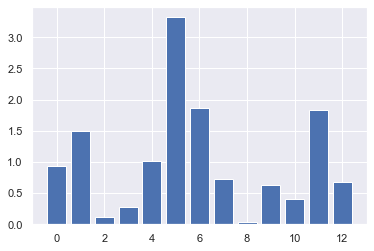

In [37]:
#already picked the best features and analyzed
print('train betas:', accuracy_train_logist_my_one)
print('test betas:', accuracy_test_logist_my_one)

importance_train = abs(betas_train_my_logist_one)
for i, v in enumerate(importance_train):
    print('Feature: %0d, Score: %.5f' % (i, v))
plt.bar([x for x in range(len(importance_train))], importance_train)


## Analyze the coefficients of fitted initial logistic regression model(using all features), select two most important features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results, make the following plot using the test set:

datapoints with cluster centers and decision boundary, color the datapoints according to Kmeans predictions
color the datapoints on which predictions of logistic regression and Kmeans disagree with separate color


In [38]:
target_col_name = 'diagnosis'
df_corr = df.corr()
print(df.head())
cor_target = abs(df_corr[target_col_name])
cor_target.sort_values(inplace = True)
cor_target.dropna(inplace=True)
cor_target = cor_target[:-1]
print(cor_target)

def show_correlation_summary(cor_target):
    very_high_correlation = cor_target[(cor_target >= 0.9) & (cor_target <= 1)]
    high_correlation = cor_target[(cor_target >= 0.7) & (cor_target < 0.9)]
    moderate_correlation = cor_target[(cor_target >= 0.5) & (cor_target < 0.7)]
    low_correlation = cor_target[(cor_target >= 0.3) & (cor_target < 0.5)]
    negligible_correlation = cor_target[(cor_target < 0.3)]
    print('very_high_correlation: ', very_high_correlation.index.tolist())
    print('high_correlation: ', high_correlation.index.tolist())
    print('moderate_correlation: ', moderate_correlation.index.tolist())
    print('low_correlation: ', low_correlation.index.tolist())
    print('very_low_correlation: ', negligible_correlation.index.tolist())
show_correlation_summary(cor_target)
best_feature = cor_target.idxmax()
print('best_feature: ', best_feature)

   diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.2419                 0.07871     1.0950      0.9053   
1         0.1812                 0.05667     0.5435      0.7339   
2         0.2069                 0.05999     0.7456      0.7869   
3         0.2597                 0.09744     0.4956      1.1560   
4         0.1809                 0.05883     0.7572      0.7813   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0       0.006399         0.04904      0.03003             

In [39]:
# from above summary we se that most important 
#features could be ['radius_mean', 'radius_se', 'compactness_mean'], 
#we will choose 'radius_mean' and 'compactness_mean'

In [40]:
feature1 = 'radius_mean'
feature2 = 'compactness_mean'
col1, col2 = xTrain_unsc.columns.get_loc(feature1), xTrain_unsc.columns.get_loc(feature2)
xTrain_two, xTest_two = xTrain[:, [col1, col2]], xTest[:, [col1, col2]]

In [41]:
xTrain_unsc_two = xTrain_unsc[[feature1, feature2]]
xTest_unsc_two = xTest_unsc[[feature1, feature2]]

In [42]:
model_my_logist_two = LogisticRegressionImpl(lamda=.01, threshold=0.5,  epsilon=1e-6, learning_rate=1e-4, max_steps=10000)

In [43]:
k = 3 # + intercept 
n_tr = len(xTrain_two)
n_ts = len(xTest_two)

if ((xTrain_two.shape != (n_tr, k)) and (xTest_two.shape != (n_ts, k))): 
    xTrain_two = model_my.matrix_data(xTrain_two)
    xTest_two = model_my.matrix_data(xTest_two)

In [44]:
betas_train_my_logist_two = model_my_logist_two.fit(xTrain_two, yTrain)
print('betas_train_my_logist_two: ', betas_train_my_logist_two)

betas_test_my_logist_two = model_my_logist_two.fit(xTest_two, yTest)
print('betas_test_my_logist_two: ', betas_test_my_logist_two)

betas_train_my_logist_two:  [-0.2511292   0.06586314 -0.25112067]
betas_test_my_logist_two:  [-0.24280664  0.679519   -0.24271784]


In [45]:
y_pred_train_my_logist_two = model_my_logist_two.predict(xTrain_two, betas_train_my_logist_two)
y_pred_test_my_logist_two = model_my_logist_two.predict(xTest_two, betas_test_my_logist_two)

In [46]:
accuracy_test_logist_my_two = metrics.accuracy_score(yTest, y_pred_test_my_logist_two)
accuracy_train_logist_my_two = metrics.accuracy_score(yTrain, y_pred_train_my_logist_two)

In [47]:
print('accuracy_test_logist_my_two: ', accuracy_test_logist_my_two * 100)
print('accuracy_train_logist_my_two: ', accuracy_train_logist_my_two * 100)

accuracy_test_logist_my_two:  66.66666666666666
accuracy_train_logist_my_two:  62.637362637362635


In [48]:
#train My_Kmeans
model_my_two = KMeans_My(K, metric='L1', max_iter=1000, eps=1e-6, centers_init='random')
centers_kmeans_my = model_my_two.fit(xTrain_two)

In [49]:
y_pred_train_my_kmeans_two, dist_arr = model_my_two.predict(xTrain_two)
y_pred_test_my_kmeans_two, dist_arr = model_my_two.predict(xTest_two)

In [50]:
best_accuracy_train_my_kmeans = metrics.accuracy_score(yTrain, y_pred_train_my_kmeans_two)
best_accuracy_test_my_kmeans = metrics.accuracy_score(yTest, y_pred_test_my_kmeans_two)

In [51]:
print('accuracy_train_logist_my_two: ', accuracy_train_logist_my_two * 100)
print('best_accuracy_train_my_kmeans: ', best_accuracy_train_my_kmeans * 100)
print('accuracy_test_logist_my_two: ', accuracy_test_logist_my_two * 100)
print('best_accuracy_test_my_kmeans: ', best_accuracy_test_my_kmeans * 100) 

accuracy_train_logist_my_two:  62.637362637362635
best_accuracy_train_my_kmeans:  53.18681318681319
accuracy_test_logist_my_two:  66.66666666666666
best_accuracy_test_my_kmeans:  54.385964912280706


## Compare performance of best Kmeans model with the performance of Kmeans in sklearn library, using the same hyperparameters.

In [52]:
kmeans_sk = KMeans(n_clusters=2, random_state=42, max_iter=1000, tol=1e-4, init='random')
kmeans_sk.fit(xTrain_two)

y_kmeans_train_sklearn = kmeans_sk.predict(xTrain_two)
y_kmeans_test_sklearn = kmeans_sk.predict(xTest_two)

centers_sk = kmeans_sk.cluster_centers_

In [53]:
accuracy_train_sklearn_kmeans = metrics.accuracy_score(yTrain, y_kmeans_train_sklearn)
accuracy_test_sklearn_kmeans = metrics.accuracy_score(yTest, y_kmeans_test_sklearn)

In [54]:
print('accuracy_train_sklearn_kmeans: ', accuracy_train_sklearn_kmeans * 100)
print('best_accuracy_train_my_kmeans: ', best_accuracy_train_my_kmeans * 100)
print('accuracy_test_sklearn_kmeans: ', accuracy_test_sklearn_kmeans * 100)
print('best_accuracy_test_my_kmeans: ', best_accuracy_test_my_kmeans * 100) 

accuracy_train_sklearn_kmeans:  40.879120879120876
best_accuracy_train_my_kmeans:  53.18681318681319
accuracy_test_sklearn_kmeans:  36.84210526315789
best_accuracy_test_my_kmeans:  54.385964912280706


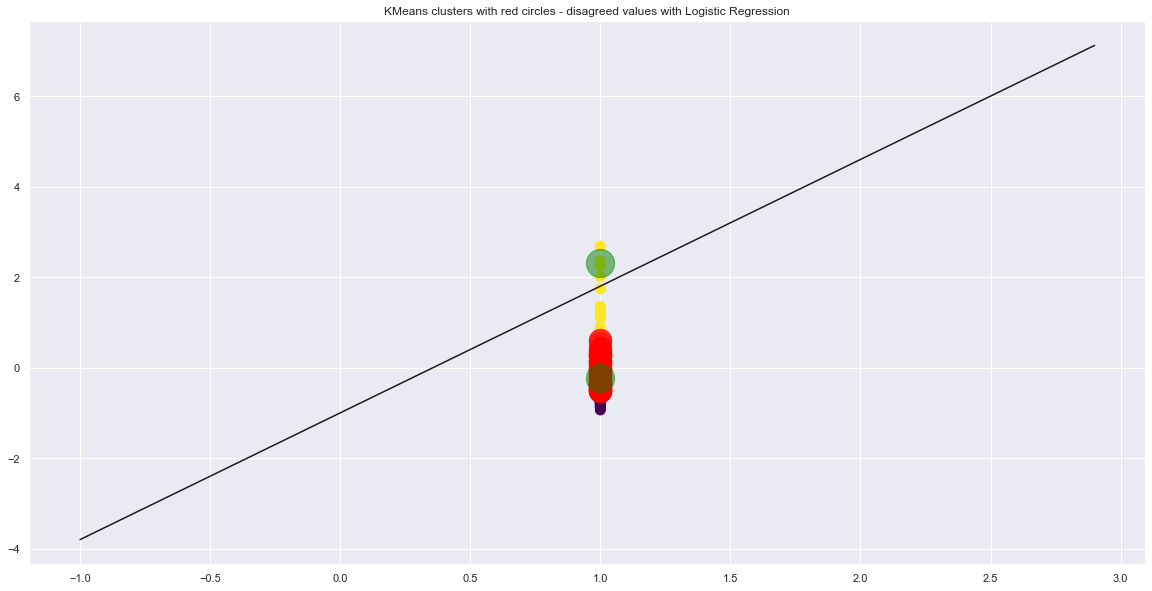

In [55]:
plt.figure(figsize=(20,10))
plt.scatter(xTest_two[:, 0], xTest_two[:, 1], c=y_pred_test_my_logist_two, s=100, cmap='viridis')

dis_ind = y_pred_test_my_logist_two != y_pred_test_my_kmeans_two
dis_val = xTest_two[dis_ind]
plt.scatter(dis_val[:, 0], dis_val[:, 1], c='red', s=500, alpha=0.5, cmap='viridis')

x1 = np.arange(-1, 3, 0.1) 
x2 = -(betas_test_my_logist_two[0] + betas_test_my_logist_two[1] * x1) / betas_test_my_logist_two[2] 
plt.plot(x1, x2, c='k', label='reg line') 
plt.scatter(centers_kmeans_my[:, 0], centers_kmeans_my[:, 1], c='green', s=800, alpha=0.5)
plt.title('KMeans clusters with red circles - disagreed values with Logistic Regression')
plt.show()

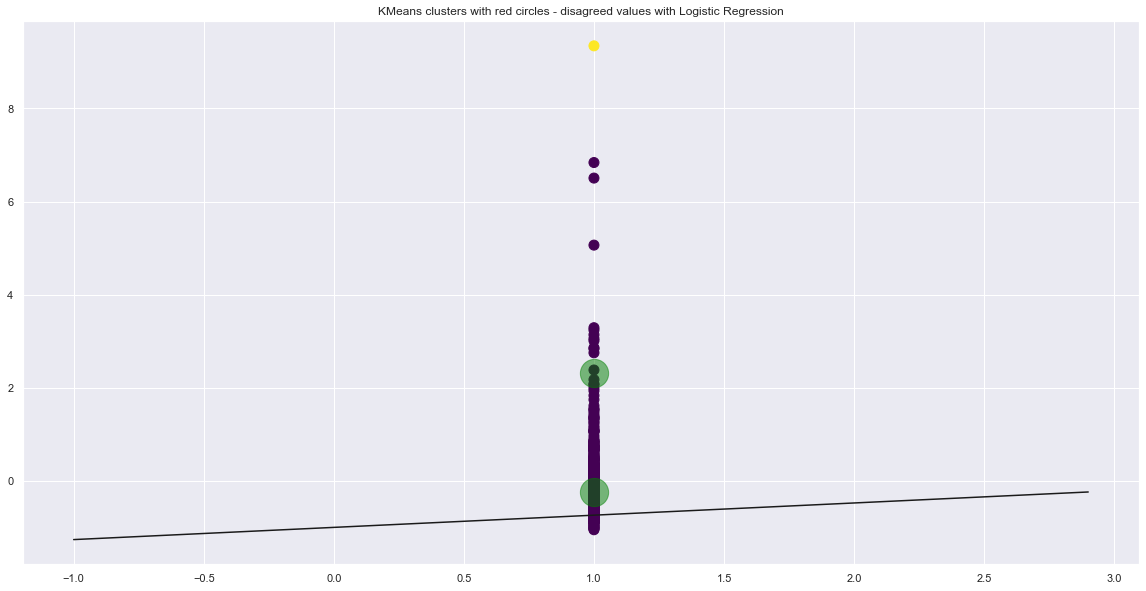

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(xTrain_two[:, 0], xTrain_two[:, 1], c=y_pred_train_my_logist_two, s=100, cmap='viridis')

dis_ind = y_pred_train_my_logist_two != y_pred_train_my_kmeans_two
dis_val = xTrain_two[dis_ind]
plt.scatter(dis_val[:, 0], dis_val[:, 1], c='red', s=500, alpha=0.0, cmap='viridis')

x1 = np.arange(-1, 3, 0.1) 
x2 = -(betas_train_my_logist_two[0] + betas_train_my_logist_two[1] * x1) / betas_train_my_logist_two[2] 
plt.plot(x1, x2, c='k', label='reg line') 
plt.scatter(centers_kmeans_my[:, 0], centers_kmeans_my[:, 1], c='green', s=800, alpha=0.5)
plt.title('KMeans clusters with red circles - disagreed values with Logistic Regression')
plt.show()